<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

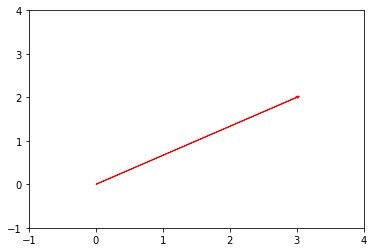

In [2]:
a = [3, 2]
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1.0,4.0)
plt.ylim(-1.0,4.0)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = [17, -4, -2, 1]
print ('Norm of b:', np.linalg.norm(b))

Norm of b: 17.60681686165901


Norm represents the 'length' of a vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
print ('Dot product of c and d:', np.dot(c,d))

Dot product of c and d: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.mat('7 4 2; 1 3 1; 2 6 -4')
print ('Inverse of E:\n', E.I)
print ('Transpose of E:\n', E.T)

Inverse of E:
 [[ 0.17647059 -0.2745098   0.01960784]
 [-0.05882353  0.31372549  0.04901961]
 [ 0.          0.33333333 -0.16666667]]
Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2  1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
print ('Mean of data:')
print (df.mean())
print ('\nVariance of data:')
print (df.var())
print ('\nStandard Deviation of data:')
print (df.std())

Mean of data:
customers    1135.714286
snow            2.714286
dtype: float64

Variance of data:
customers    98761.904762
snow             8.571429
dtype: float64

Standard Deviation of data:
customers    314.264069
snow           2.927700
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, the two variances are not comparable. 

The two variances are not only in different units (people^2 and in^2), but they also are not standardized for scale of the feature. 

A variance of 8 inches^2 of snow is very large when the mean snowfall is 2.7 inches. However, a variance of 8 people^2 would be very small, given that the mean customer amount is 1135 people.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [10]:
# Only numeric columns in dataframe for pasing to PCA
X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

# numpy_X = X.values
# print(numpy_X)

In [12]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_std = std_scale.fit_transform(X)
X_std

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535,  0.73740709, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112,  0.13055067],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047,  0.9292974 ,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624,  1.54795798],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912, -0.0575671 , -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664, -0.54085279],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 , -1.60913739,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
X_pca = pca_2.fit_transform(X_std)

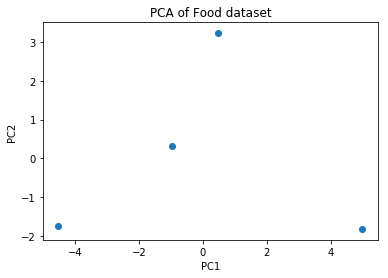

In [14]:
# plotting
fig_pca, ax_pca = plt.subplots()

ax_pca.set_title('PCA of Food dataset')

ax_pca.scatter(X_pca[:,0], X_pca[:,1])

ax_pca.set_xlabel('PC1')
ax_pca.set_ylabel('PC2')

plt.show()

A little anti-climactic with 4 data points lol

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

### Data Import

In [15]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values

In [0]:
# k means clustering imports
from sklearn.cluster import KMeans

### Choosing Cluster Count

First, let's try to find the correct number of clusters. To do so, we will plot the sum of squared distances from centroids for different cluster counts.

At some point, we would expect the sum of squared distances to stop decreasing and flatten out as we add more clusters. Anything beyond this flattening point will form unnecessary clusters.

In [0]:
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

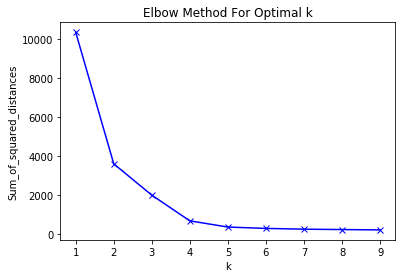

In [19]:
# graphing sum of squared distances
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

4-5ish seems like the right amount of clusters, let's work with that.

### K=4 Clustering (SPOILER ALERT - not the right amount)

In [0]:
# kmeans with k=4
km4 = KMeans(n_clusters=4)
km4 = km4.fit(points)
points['K4 Cluster Label'] = km4.labels_

In [0]:
!pip install seaborn==0.9.0 -q
import seaborn as sns

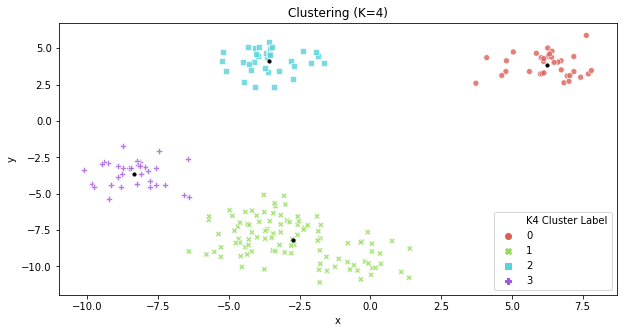

In [29]:
# plot the principal components and labels
palette = sns.color_palette("hls", 4)

fig, ax = plt.subplots(figsize=(10,5))

# plot clusters
sns.scatterplot(ax=ax, x='x', y='y', data=points, 
                hue='K4 Cluster Label',
                style='K4 Cluster Label',
                alpha=0.8,
                palette=palette,
                legend='full')

# plot centroids
ax.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], 
           color='black',
           s=10)

ax.set_title('Clustering (K=4)')
ax.legend(loc='lower right')

plt.show()

### K=5 Clustering - Final Product

Since we only have a few variables, there doesn't seem to be much of a point in doing PCA or any other transformations. Seems like we did an okay job of identifiyng the clusters.

Let's try 5, maybe that bottom cluster should be broken up into two different ones.

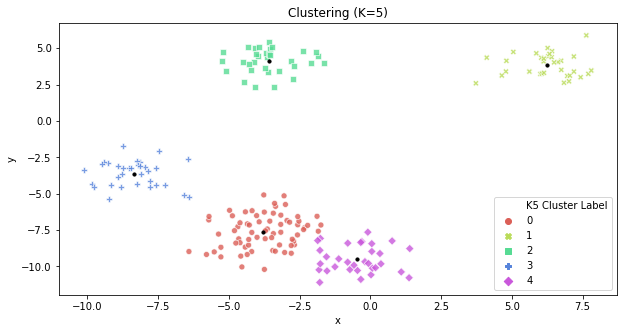

In [30]:
# kmeans with k=5
km5 = KMeans(n_clusters=5)
km5 = km5.fit(points)
points['K5 Cluster Label'] = km5.labels_

# plot the principal components and labels
palette = sns.color_palette("hls", 5)

fig, ax = plt.subplots(figsize=(10,5))

# plot clusters
sns.scatterplot(ax=ax, x='x', y='y', data=points, 
                hue='K5 Cluster Label',
                style='K5 Cluster Label',
                alpha=0.8,
                palette=palette,
                legend='full')

# plot centroids
ax.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1], 
           color='black',
           s=10)

ax.set_title('Clustering (K=5)')
ax.legend(loc='lower right')

plt.show()